In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator to verify it works
datagen = ImageDataGenerator()
print("ImageDataGenerator successfully created:", datagen)

ImageDataGenerator successfully created: <keras.src.legacy.preprocessing.image.ImageDataGenerator object at 0x0000025FF8046F90>


In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LambdaCallback
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import datetime
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import io
from tqdm import tqdm

In [4]:
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [5]:
data_dir = "ml_dataset"
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    file_path = os.path.join(data_dir, fold)
    if not os.path.isdir(file_path):
        continue
    fpath = os.listdir(file_path)
    
    for f in fpath:
        fil_path=os.path.join(file_path,f)
        filepaths.append(fil_path)
        labels.append(fold)

f_series=pd.Series(filepaths,name='filepaths')
l_series=pd.Series(labels,name='labels')
df=pd.concat([f_series, l_series], axis= 1)

In [6]:
df

,filepaths,labels
0,ml_dataset\Bengin_cases\Bengin case (1).jpg,Bengin_cases
1,ml_dataset\Bengin_cases\Bengin case (10).jpg,Bengin_cases
2,ml_dataset\Bengin_cases\Bengin case (100).jpg,Bengin_cases
3,ml_dataset\Bengin_cases\Bengin case (101).jpg,Bengin_cases
4,ml_dataset\Bengin_cases\Bengin case (102).jpg,Bengin_cases
...,...,...
1092,ml_dataset\Normal_cases\Normal case (95).jpg,Normal_cases
1093,ml_dataset\Normal_cases\Normal case (96).jpg,Normal_cases
1094,ml_dataset\Normal_cases\Normal case (97).jpg,Normal_cases
1095,ml_dataset\Normal_cases\Normal case (98).jpg,Normal_cases


In [7]:
labels_count = df['labels'].value_counts().reset_index()
labels_count 

,labels,count
0,Malignant_cases,561
1,Normal_cases,416
2,Bengin_cases,120


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,         # Normalize pixel values to [0, 1]
    rotation_range=30,         # Rotate images by up to 30 degrees
    width_shift_range=0.2,     # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,    # Shift images vertically by up to 20% of the height
    shear_range=0.2,           # Apply shearing transformations
    zoom_range=0.2,            # Random zoom in/out
    horizontal_flip=True,      # Flip images horizontally
    vertical_flip=True,        # Flip images vertically
    brightness_range=[0.8, 1.2] # Adjust brightness
)

# Example usage
train_generator = train_datagen.flow_from_directory(
     "ml_dataset",
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'      # Binary classification
)

Found 1097 images belonging to 3 classes.


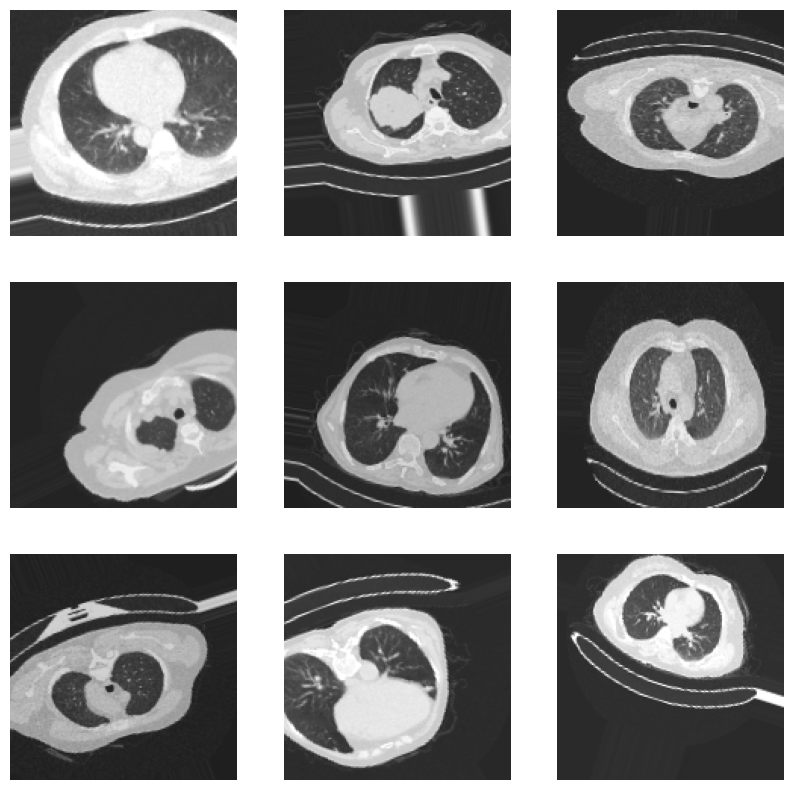

In [9]:
import matplotlib.pyplot as plt

# Fetch a batch of augmented images
augmented_images, _ = next(train_generator)

# Plot a few augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.show()


In [10]:
def load_images_from_directory(directory, labels, img_size=(128, 128)):
    images, image_labels = [], []
    for label, folder in enumerate(labels):
        path = os.path.join(directory, folder)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = cv2.imread(img_path)
            image = cv2.resize(image, img_size)
            images.append(image)
            image_labels.append(label)
    return np.array(images), np.array(image_labels)

# Define dataset path and labels
data_dir = "ml_dataset"
labels = ["Normal_cases", "Malignant_cases", "Bengin_cases"]
X, y = load_images_from_directory(data_dir, labels)
X = X / 255.0  # Normalize pixel values
y = to_categorical(y, num_classes=3)  # One-hot encoding for categorical output

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 output classes
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 699ms/step - accuracy: 0.4652 - loss: 2.5381 - val_accuracy: 0.7000 - val_loss: 0.7488
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 625ms/step - accuracy: 0.7688 - loss: 0.6675 - val_accuracy: 0.8727 - val_loss: 0.3760
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 660ms/step - accuracy: 0.8986 - loss: 0.3202 - val_accuracy: 0.9000 - val_loss: 0.2048
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 628ms/step - accuracy: 0.9549 - loss: 0.1517 - val_accuracy: 0.9727 - val_loss: 0.0916
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 624ms/step - accuracy: 0.9776 - loss: 0.0799 - val_accuracy: 0.9955 - val_loss: 0.0493
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 608ms/step - accuracy: 0.9870 - loss: 0.0571 - val_accuracy: 0.9864 - val_loss: 0.0464
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 605ms/step - accuracy: 0.9901 - loss: 0.0422 - val_accuracy: 0.9909 - val_loss: 0.0411
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 614ms/step - accuracy: 0.9920 - loss: 0.0288 - val_accu

In [14]:
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f"CNN Model Accuracy: {cnn_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 1.0000 - loss: 0.0178
CNN Model Accuracy: 1.0000


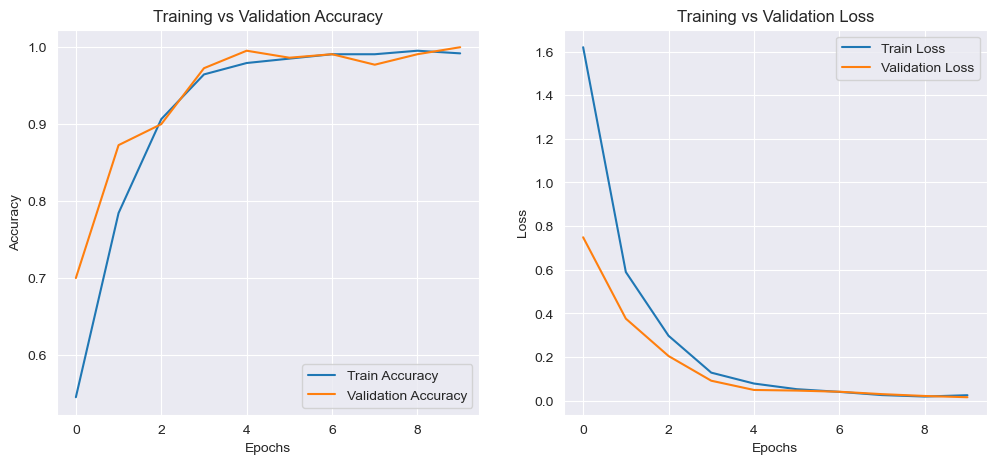

In [15]:
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step


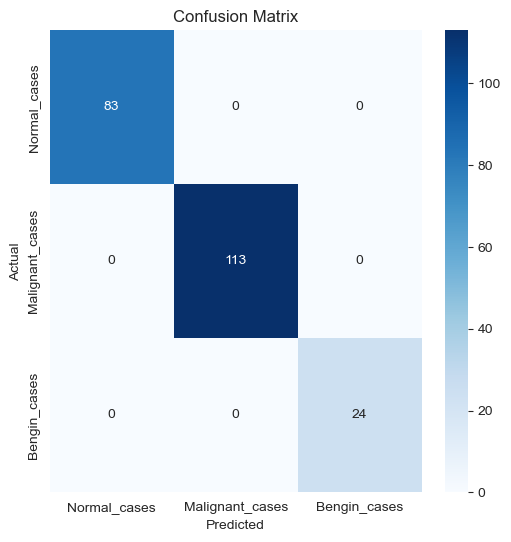

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(cnn_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Flatten, Dense, Reshape, Input, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
img_shape = (128, 128, 1)

In [19]:
def build_generator():
    model = Sequential()
    model.add(Dense(128 * 32 * 32, activation='relu', input_shape=(100,)))
    model.add(Reshape((32, 32, 128)))
    model.add(Conv2DTranspose(128, (3,3), strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(64, (3,3), strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(1, (3,3), activation='tanh', padding='same'))
    return model

In [20]:
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, (3,3), strides=2, input_shape=img_shape, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3,3), strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [21]:
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
discriminator.trainable = False
z = Input(shape=(100,))
img = generator(z)
validity = discriminator(img)
gan = Model(z, validity)
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [22]:
data_gen = ImageDataGenerator(rescale=1./255)
dataset = data_gen.flow_from_directory('ml_dataset', target_size=(128,128), color_mode='grayscale', batch_size=32, class_mode='categorical')

Found 1097 images belonging to 3 classes.


In [23]:
def train_gan(epochs=20, batch_size=32):
    for epoch in range(epochs):
        real_imgs, _ = next(dataset)
        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_imgs = generator.predict(noise)
        labels_real = np.ones((batch_size, 1))
        labels_fake = np.zeros((batch_size, 1))
        d_loss_real = discriminator.train_on_batch(real_imgs, labels_real)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, labels_fake)
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss_real[0]}, G Loss: {g_loss}")

In [24]:
train_gan(epochs=20, batch_size=32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Epoch 0, D Loss: 0.7028812170028687, G Loss: [array(0.698051, dtype=float32), array(0.698051, dtype=float32), array(0.421875, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [25]:
def build_classifier():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=img_shape, padding='same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # 3 classes: Normal, Benign, Malignant
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [26]:
classifier = build_classifier()
classifier.fit(dataset, epochs=30, steps_per_epoch=len(dataset))

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 50s 987ms/step - accuracy: 0.5294 - loss: 1.4120
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8710 - loss: 0.3604
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 966ms/step - accuracy: 0.9565 - loss: 0.1367
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9965 - loss: 0.0245
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9964 - loss: 0.0217
Epoch 10/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 37s 950ms/step - accuracy: 0.9940 - loss: 0.0227
Epoch 12/30
35/35 ━

In [27]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_dataset = test_data_gen.flow_from_directory(
    'ml_dataset',  # Path to test dataset
    target_size=(128,128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: Ensure the order is maintained
)


Found 1097 images belonging to 3 classes.


In [28]:
loss, accuracy = classifier.evaluate(test_dataset, steps=len(test_dataset))
print(f"Test Accuracy: {accuracy * 100:.2f}%")


35/35 ━━━━━━━━━━━━━━━━━━━━ 55s 801ms/step - accuracy: 0.9945 - loss: 0.0114
Test Accuracy: 99.82%


In [29]:
import numpy as np

# Get predictions
predictions = classifier.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

# Map class indices to class labels
class_labels = list(test_dataset.class_indices.keys())

# Display sample results
for i in range(10):  # Show first  predictions
    print(f"Predicted: {class_labels[predicted_labels[i]]}, Actual: {class_labels[np.argmax(test_dataset.labels[i])]}")  


35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 774ms/step
Predicted: Bengin_cases, Actual: Bengin_cases
Predicted: Bengin_cases, Actual: Bengin_cases
Predicted: Bengin_cases, Actual: Bengin_cases
Predicted: Bengin_cases, Actual: Bengin_cases
Predicted: Bengin_cases, Actual: Bengin_cases
Predicted: Bengin_cases, Actual: Bengin_cases
Predicted: Bengin_cases, Actual: Bengin_cases
Predicted: Bengin_cases, Actual: Bengin_cases
Predicted: Bengin_cases, Actual: Bengin_cases
Predicted: Bengin_cases, Actual: Bengin_cases


In [30]:
from tensorflow.keras.preprocessing import image

def predict_single_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    prediction = classifier.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    
    print(f"Predicted Class: {predicted_class}")

# Example usage
predict_single_image('ml_dataset/Normal_cases/Normal case (102).jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
Predicted Class: Normal_cases


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


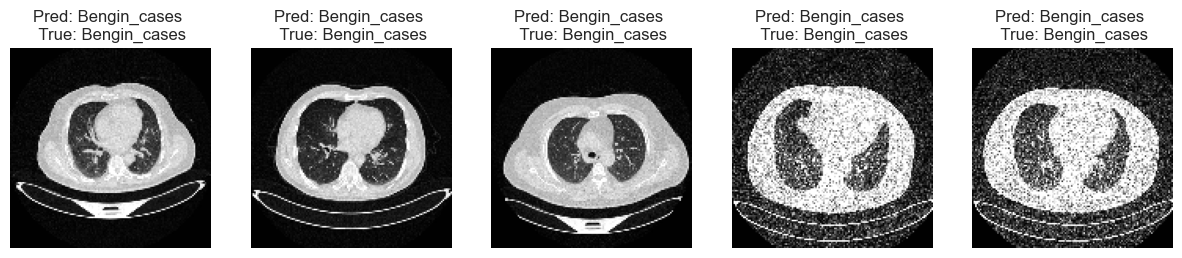

In [31]:
import matplotlib.pyplot as plt

def plot_sample_predictions(dataset, model, num_samples=5):
    images, labels = next(dataset)  # Get a batch of images
    predictions = model.predict(images)
    
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f"Pred: {class_labels[np.argmax(predictions[i])]} \n True: {class_labels[np.argmax(labels[i])]}")
        axes[i].axis('off')

plot_sample_predictions(test_dataset, classifier)
